In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
train_data_path = '../data/train.csv'
test_data_path = '../data/test.csv'
valid_data_path = '../data/valid.csv'

In [4]:
# Load training data and labels
train_data = pd.read_csv(train_data_path)
X_train, y_train = train_data.drop('Class', axis=1), train_data['Class']

# Load validation data and labels
valid_data = pd.read_csv(valid_data_path)
X_valid, y_valid = valid_data.drop('Class', axis=1), valid_data['Class']

In [5]:
# Combine training and validation for visualization
X = np.vstack((X_train, X_valid))
y = np.hstack((y_train, y_valid))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

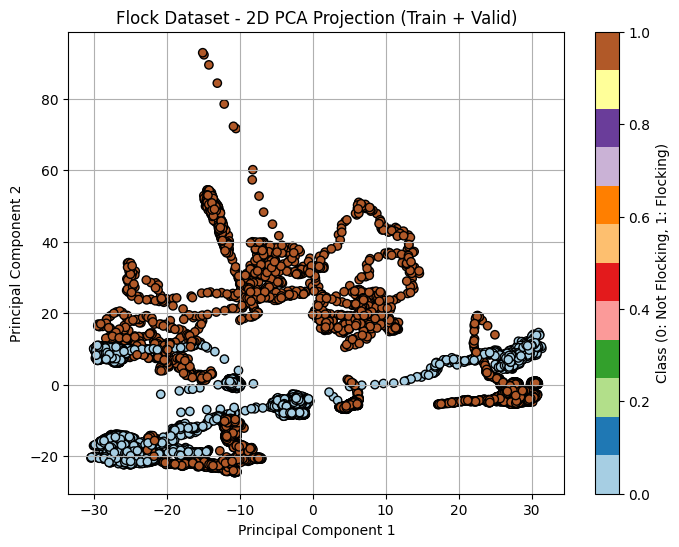

In [8]:
# Visualization 1: 2D PCA Projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Paired', edgecolor='k')
plt.colorbar(scatter, label='Class (0: Not Flocking, 1: Flocking)')
plt.title('Flock Dataset - 2D PCA Projection (Train + Valid)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

e:\Projects\Python\Models\ml-flock\.env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


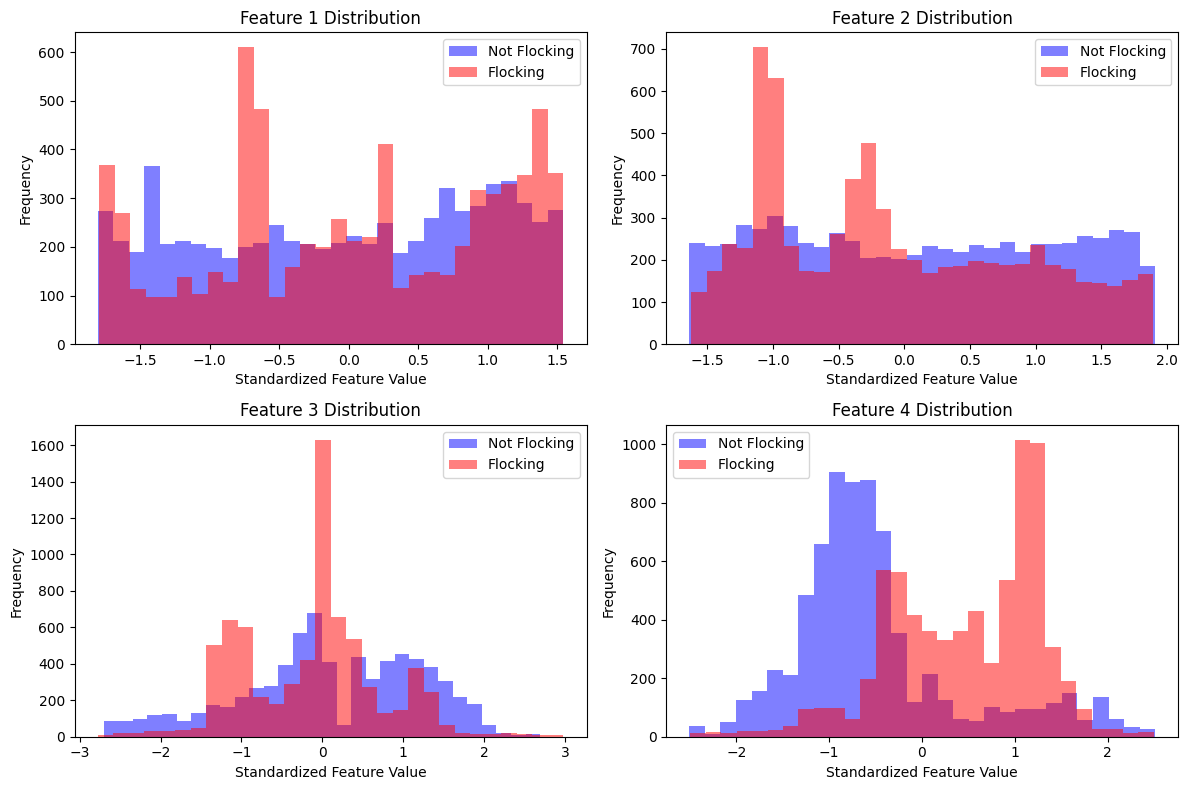

In [10]:
# Visualization 2: Histograms of First Few Features (Training Set)
X_train_scaled = scaler.transform(X_train)
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(X_train_scaled[y_train == 0, i], bins=30, alpha=0.5, label='Not Flocking', color='blue')
    plt.hist(X_train_scaled[y_train == 1, i], bins=30, alpha=0.5, label='Flocking', color='red')
    plt.title(f'Feature {i+1} Distribution')
    plt.xlabel('Standardized Feature Value')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

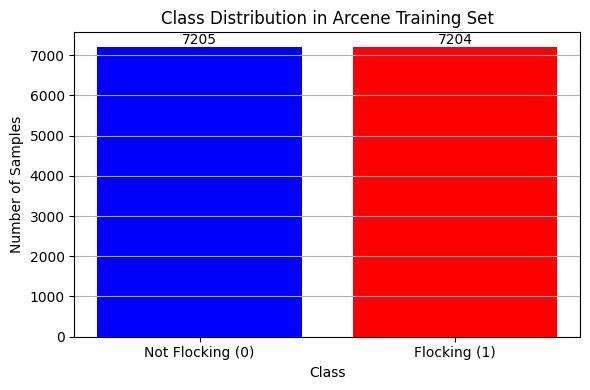

In [ ]:
# Visualization 3: Class Distribution (Training Set)

plt.figure(figsize=(6, 4))
unique, counts = np.unique(y_train, return_counts=True)
bars = plt.bar(unique, counts, tick_label=['Not Flocking (0)', 'Flocking (1)'], color=['blue', 'red'])

for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.2, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution in Flocking Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
